In [38]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import functions_harper as hf
import functions_Ana as af
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format ='retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Importing the Planck15 Raw CMB data from https://irsa.ipac.caltech.edu/data/Planck/release_2/all-sky-maps/

In [44]:
CMB_map_names = ["LFI_SkyMap_030_1024_R2.01_full.fits",
                 "LFI_SkyMap_044_1024_R2.01_full.fits" ,
                 "LFI_SkyMap_070_1024_R2.01_full.fits",
                 "HFI_SkyMap_100_2048_R2.02_full.fits", 
                 "HFI_SkyMap_143_2048_R2.02_full.fits",
                 "HFI_SkyMap_217_2048_R2.02_full.fits", 
                 "HFI_SkyMap_353_2048_R2.02_full.fits", 
                 "HFI_SkyMap_545_2048_R2.02_full.fits", 
                 "HFI_SkyMap_857_2048_R2.02_full.fits",];

In [45]:
CMB_maps = []
for i in CMB_map_names:
    
    temp = hp.read_map("../CMB_maps/%s"%(i))
    temp2 = hp.pixelfunc.ud_grade(temp, 512, order_in='RING') #to have the same resolution for all maps
    CMB_maps.append(temp2)
CMB_maps

NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


[array([-3.90142095e-05, -9.70940164e-05, -6.99814028e-05, ...,
         4.71518988e-05,  3.40329252e-05, -9.43145551e-06]),
 array([-7.91302550e-05, -5.10209657e-06,  5.51161406e-07, ...,
         6.57233168e-05,  5.93994482e-05,  6.12525714e-05]),
 array([-7.48170755e-05, -2.37688205e-05, -1.51832749e-05, ...,
         9.70609417e-05,  6.99300963e-05,  8.34240784e-05]),
 array([-1.10295736e-04, -7.10144918e-05, -1.01454806e-05, ...,
         1.06400777e-04,  8.90308813e-05,  1.02824678e-04]),
 array([-1.15055705e-04, -4.49261628e-05, -6.08080032e-06, ...,
         1.24847670e-04,  1.14404600e-04,  1.09967678e-04]),
 array([-6.40427507e-05,  1.20511628e-05,  7.67192208e-05, ...,
         1.90490434e-04,  1.77433244e-04,  1.78173225e-04]),
 array([0.00043544, 0.00047541, 0.00050082, ..., 0.00066289, 0.00067893,
        0.0006127 ]),
 array([0.43256322, 0.41644718, 0.40240306, ..., 0.50664606, 0.50723839,
        0.47341483]),
 array([0.85159717, 0.83367116, 0.82803543, ..., 0.96308072,

#### Raw data maps for all 9 frequencies


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.
0.0 180.0 -180.0 180.0
The inter

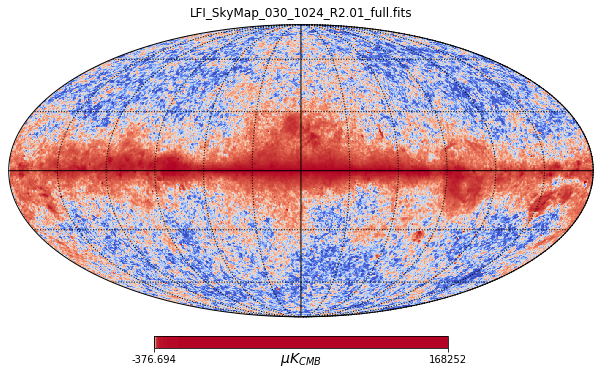

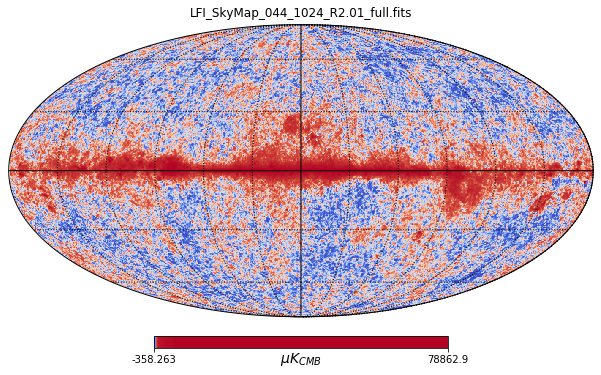

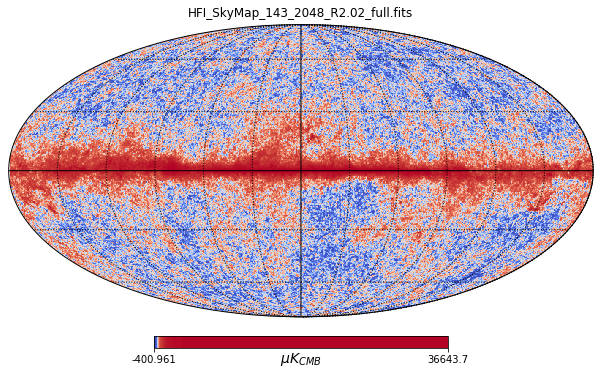

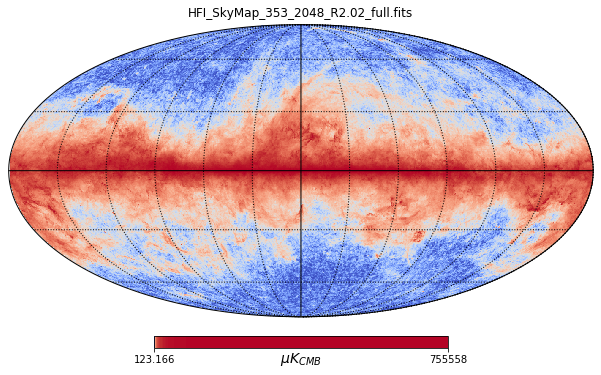

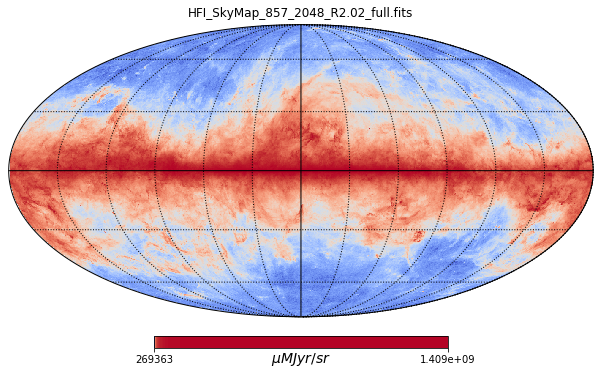

In [9]:
u = r"$\mu K_{CMB}$"
u2 = r"$\mu MJyr/sr$"
for i in range(len(CMB_maps)):
    if i < 7 :
        hp.mollview( (10**6)*CMB_maps[i], unit= u ,norm="hist", title=CMB_map_names[i], cmap = 'coolwarm'
                 #min=-1,
                 #max=1,
                 )
    else: 
        hp.mollview( (10**6)*CMB_maps[i], unit= u2 ,norm="hist", title=CMB_map_names[i], cmap = 'coolwarm'
                 #min=-1,
                 #max=1,
                 )
        
    hp.graticule()


## Data Analysis
#### First, a few important things:
the signal is given in different units depending on the band : "The signal is given in units of Kcmb for 30-353 GHz, or MJy/sr (for a constant νFν energy distribution ) for 545 and 857 GHz." Hence we need to convert the 2 highest bands to the units $K_{cmb}$.

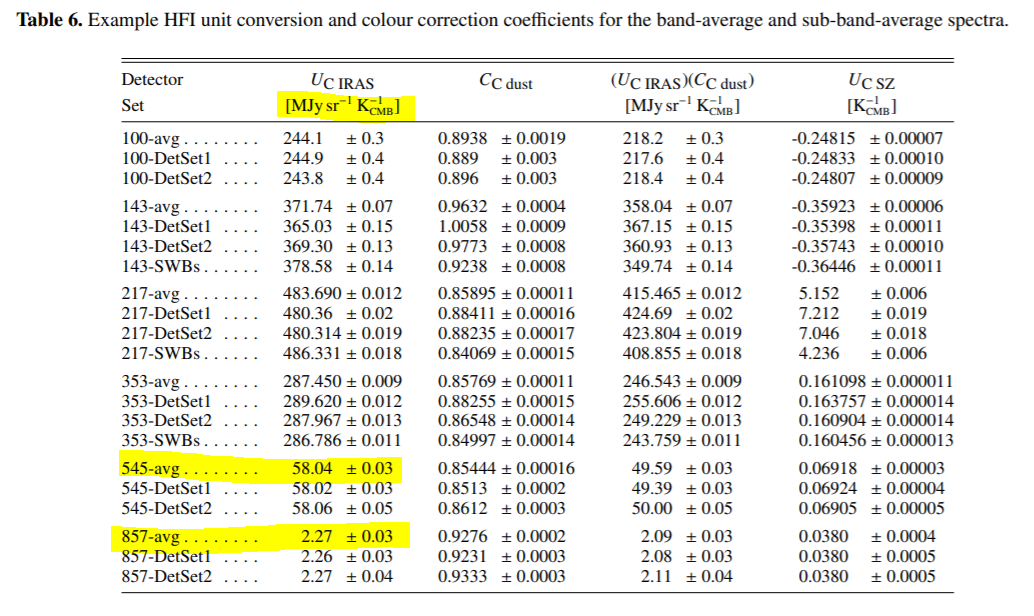

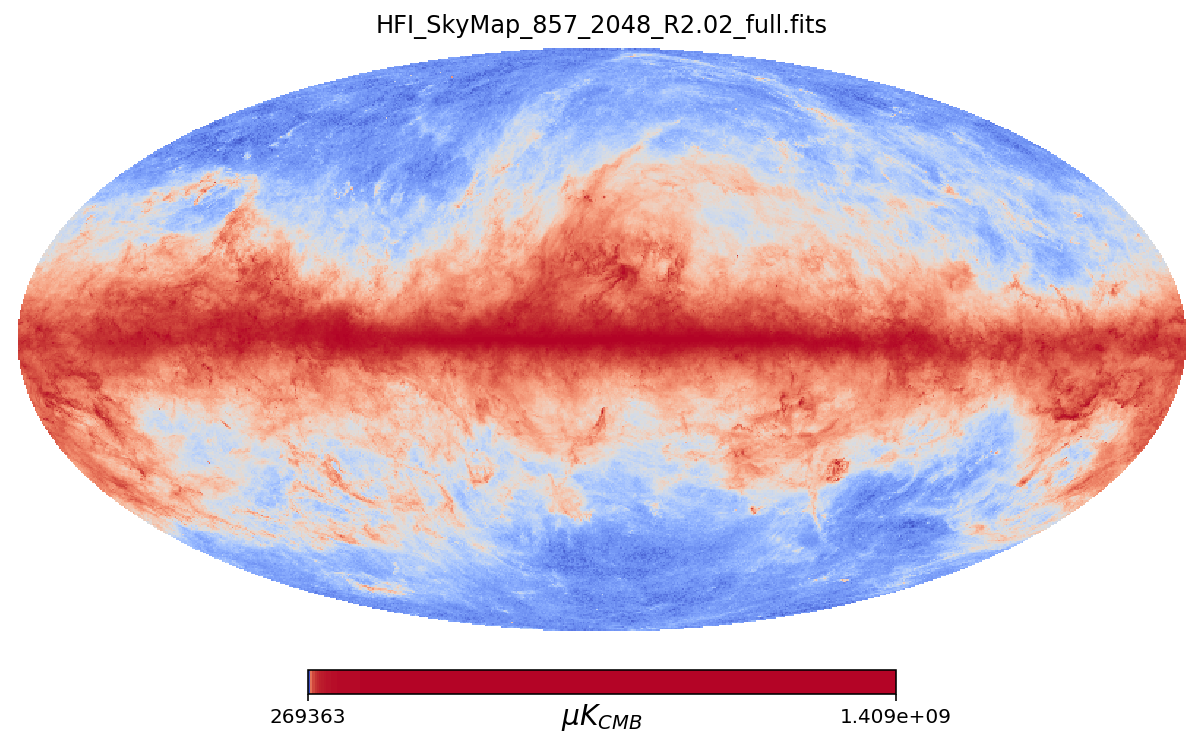

In [46]:
# the diff frequencies
freq = [30,44,70,100,143,217,353,545,857]

#the HFI where not obtained in the same units as the LFI, there exist some conversion factors:
conv_factors = [1/58.04,1/2.27]

CMB_maps_cor =[]
for i in range(2):
    #convert
    CMB_maps_cor.append(conv_factors[i]*CMB_maps[7+i])

    #visualize
    hp.mollview( (10**6)*CMB_maps_cor[i], unit= u ,norm="hist", title=CMB_map_names[i+7], cmap = 'coolwarm'
                 #min=-1,
                 #max=1,
                 )


In [53]:
#step 1
%autoreload 2
CMB_maps[7] = CMB_maps_cor[0]
CMB_maps[8] = CMB_maps_cor[1]

diff_maps = []
for i in range(len(CMB_maps)-1):
    diff_maps.append(CMB_maps[i]-CMB_maps[1+i])
    
#step 2
abs_diff_maps = np.abs(np.transpose(diff_maps))
junk_map = np.array([np.max(i) for i in abs_diff_maps])

In [57]:
#comparing junk map to 800-band map
hp.mollview( (10**6)*junk_map, unit= u ,norm="hist", title='junk', cmap = 'coolwarm'
                 #min=-1,
                 #max=1,
                 )
hp.mollview( (10**6)*CMB_maps_cor[1]-junk_map, unit= u ,norm="hist", cmap = 'coolwarm'
                 #min=-1,
                 #max=1,
                 )

### Region Finding (based on junk map)

the bin edges aka regions [2.53674752e-01 7.54245983e-01 2.24258425e+00 6.66783015e+00
 1.98253238e+01 5.89462324e+01 1.75263634e+02 5.21107801e+02
 1.54939923e+03 4.60679724e+03]


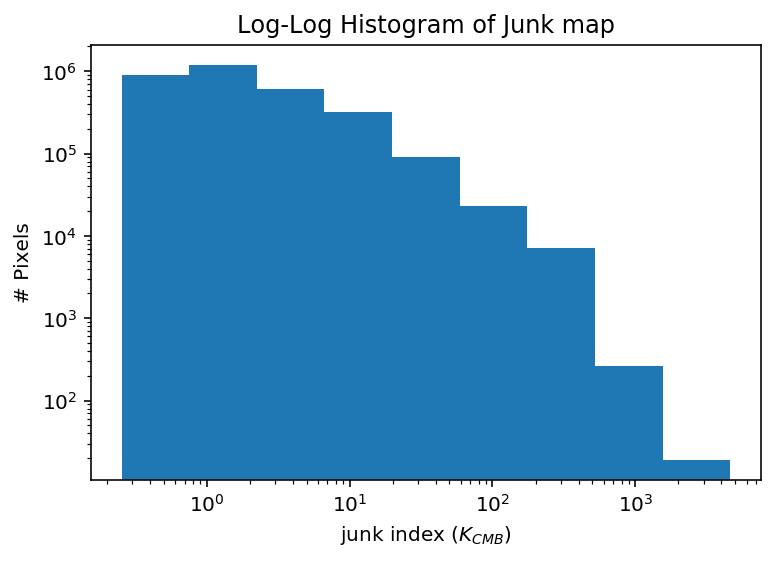

In [67]:
number_bins = 10
log_bins = np.logspace(np.log10(low_edge),np.log10(high_edge), number_bins)

#finding the edges of our hist
low_edge, high_edge = [np.min(junk_map),np.max(junk_map)]

#plotting a log hist to find the regions
plt.hist(junk_map, bins=log_bins, log= True);
plt.title('Log-Log Histogram of Junk map')
plt.semilogx()
plt.xlabel('junk index ($K_{CMB}$)')
plt.ylabel('# Pixels')
print('the bin edges aka regions',log_bins)